In [151]:
%matplotlib inline
import statsmodels as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

train_df = pd.read_csv('train.tsv', index_col='id', delimiter='\t')
train_df

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29991,V29992,V29993,V29994,V29995,V29996,V29997,V29998,V29999,Y
id,,,,,,,,,,,,,,,,,,,,,
0,1.468,1.476,1.484,1.490,1.494,1.498,1.499,1.499,1.497,1.490,...,1.561,1.562,1.561,1.559,1.558,1.558,1.556,1.555,1.553,173
1,1.493,1.492,1.490,1.490,1.490,1.492,1.493,1.497,1.499,1.500,...,1.410,1.408,1.408,1.408,1.408,1.410,1.411,1.412,1.416,155
3,1.581,1.581,1.583,1.584,1.586,1.589,1.591,1.591,1.591,1.591,...,1.532,1.534,1.533,1.530,1.528,1.527,1.527,1.526,1.526,134
4,1.531,1.530,1.530,1.530,1.530,1.530,1.530,1.531,1.531,1.530,...,1.523,1.524,1.523,1.522,1.520,1.520,1.522,1.524,1.523,130
6,1.522,1.521,1.520,1.519,1.518,1.517,1.515,1.514,1.515,1.514,...,1.561,1.561,1.560,1.558,1.559,1.559,1.558,1.559,1.561,139
7,1.543,1.547,1.551,1.555,1.562,1.568,1.572,1.576,1.580,1.583,...,1.480,1.474,1.467,1.462,1.458,1.454,1.450,1.446,1.442,135
8,1.516,1.517,1.519,1.521,1.528,1.530,1.527,1.525,1.523,1.521,...,1.569,1.576,1.581,1.582,1.583,1.583,1.581,1.581,1.581,198
9,1.539,1.539,1.539,1.538,1.539,1.539,1.538,1.538,1.538,1.538,...,1.539,1.537,1.536,1.535,1.532,1.533,1.535,1.535,1.535,178
10,1.809,1.807,1.804,1.802,1.798,1.796,1.793,1.790,1.785,1.780,...,1.551,1.551,1.551,1.551,1.549,1.548,1.548,1.547,1.546,173


In [174]:
x_train = train_df.ix[:, :'V29999']
y_train = train_df.ix[:, 'Y']

In [153]:
y_train.describe()

count    144.000000
mean     163.222222
std       32.030459
min       93.000000
25%      135.000000
50%      161.500000
75%      186.000000
max      295.000000
Name: Y, dtype: float64

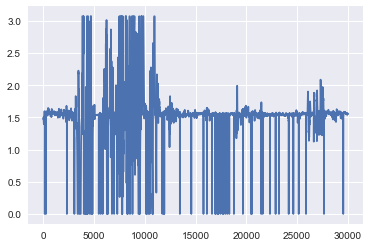

In [69]:
time = np.arange(30000)
pulse = x_train.ix[0, :].values.reshape(30000)
print()
plt.figure()
plt.plot(time, pulse)

In [82]:
rf = RandomForestRegressor(
    bootstrap=True,
    n_estimators=400,
    criterion='mse', 
    max_features='sqrt',
    random_state=1,
    oob_score=True,
)

rf.fit(x_train, y_train)
rf.oob_score_

-0.010091369868873157

In [81]:
parameters = {
    'n_estimators'           : [350, 400, 500],
    'max_features'          : [100],
    'random_state'         : [1],
}

rf_tuned = GridSearchCV(RandomForestRegressor(), parameters)
rf_tuned.fit(x_train, y_train)

# クロスバリデーションによって得られた最適なパラメータの表示
print(rf_tuned.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=100, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)


In [168]:
x_test = pd.read_csv('test.tsv', index_col='id', delimiter='\t')

In [198]:
pred = np.ones(57)*y_train.median() - 0.5
y_test = pd.DataFrame({
    'id': x_test.index,
    'pred': pred})
y_test.to_csv('median.csv', header=None, index=None)

In [125]:
median_pulse_train = x_train.median(axis=1)
median_pulse_train.values

array([ 1.548 ,  1.551 ,  1.537 ,  1.537 ,  1.54  ,  1.533 ,  1.553 ,
        1.543 ,  1.541 ,  1.551 ,  1.556 ,  1.528 ,  1.55  ,  1.548 ,
        1.553 ,  1.538 ,  1.548 ,  1.518 ,  1.527 ,  1.548 ,  1.543 ,
        1.544 ,  1.548 ,  1.539 ,  1.533 ,  1.543 ,  1.545 ,  1.531 ,
        1.548 ,  1.52  ,  1.555 ,  1.546 ,  1.54  ,  1.537 ,  1.53  ,
        0.    ,  1.543 ,  1.553 ,  1.54  ,  1.548 ,  1.545 ,  1.533 ,
        1.544 ,  1.522 ,  1.551 ,  1.562 ,  1.544 ,  1.533 ,  1.545 ,
        1.558 ,  1.545 ,  1.53  ,  1.544 ,  1.537 ,  1.552 ,  1.547 ,
        1.548 ,  1.528 ,  1.531 ,  1.521 ,  1.54  ,  1.546 ,  1.539 ,
        1.554 ,  1.559 ,  1.541 ,  1.535 ,  1.538 ,  1.557 ,  1.551 ,
        1.546 ,  1.546 ,  1.553 ,  1.552 ,  1.538 ,  1.538 ,  1.532 ,
        1.546 ,  1.538 ,  1.558 ,  1.553 ,  1.531 ,  1.535 ,  1.525 ,
        1.554 ,  1.54  ,  1.54  ,  1.544 ,  1.543 ,  1.556 ,  1.549 ,
        1.534 ,  1.535 ,  1.531 ,  1.536 ,  1.551 ,  1.553 ,  1.538 ,
        1.546 ,  1.5

In [121]:
median_pulse_test = x_test.median(axis=1)
median_pulse_test.ix[188] = 1.541

In [317]:
x_train.ix[38, :].where(x_train.ix[38] > 0.1).describe()

count    29782.000000
mean         1.541349
std          0.130899
min          0.102000
25%          1.517000
50%          1.540000
75%          1.569000
max          2.997000
Name: 38, dtype: float64

In [319]:
np.log(x_test.quantile(.95, axis=1) - x_test.quantile(.05, axis=1))

id
2     -2.813411
5     -2.864704
12    -2.292635
18    -2.764621
19    -1.766092
24     0.451712
40    -1.634756
42    -2.937463
43    -1.527858
46     0.034401
49    -1.347074
51    -2.162823
54     0.541190
58    -1.698269
59    -0.605045
60    -0.933946
62    -1.995100
65    -1.283738
70    -0.283690
71    -2.111965
75    -0.231869
76    -1.980502
80    -2.312635
87    -0.581606
91     0.400854
96    -2.216407
98     1.057808
110   -0.578034
111    0.184028
112   -2.017406
115   -1.021651
122   -1.220610
123   -1.518684
124   -0.829998
126   -0.778705
127   -1.714798
129   -0.286283
130   -2.631089
133   -2.501036
135   -2.128632
136   -2.956512
139    0.753842
141   -1.951928
148   -1.491655
153   -3.863233
158   -2.673649
159    0.736231
161   -0.092115
170   -2.577022
174   -3.442019
176    0.166404
185   -1.569977
187   -0.667382
188    0.483660
191   -2.162823
199   -3.270169
200   -1.532477
dtype: float64

In [321]:
from sklearn.linear_model import Ridge

feature = np.log(x_train.quantile(.95, axis=1) - x_train.quantile(.05, axis=1))

parameters = {
    'alpha' : np.arange(0.001, 0.1, 0.01),
}

ridge_tuned = GridSearchCV(Ridge(), parameters)
ridge_tuned.fit(feature.reshape(144, 1), y_train.reshape(144, 1))

# クロスバリデーションによって得られた最適なパラメータの表示
print(ridge_tuned.best_estimator_)

Ridge(alpha=0.090999999999999984, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)


/Users/yoko/.anyenv/envs/pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [323]:
ridge_tuned = Ridge(0.091)
ridge_tuned.fit(feature.reshape(144, 1), y_train.reshape(144, 1))

feature_test = np.log(x_test.quantile(.95, axis=1) - x_test.quantile(.05, axis=1))
pred = ridge_tuned.predict(feature_test.reshape(-1, 1))

y_test = pd.DataFrame({
    'id': x_test.index,
    'pred': pred.reshape(-1)})
y_test.to_csv('ridge_rigression_by_pulse_median.csv', header=None, index=None)

/Users/yoko/.anyenv/envs/pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/yoko/.anyenv/envs/pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


/Users/yoko/.anyenv/envs/pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


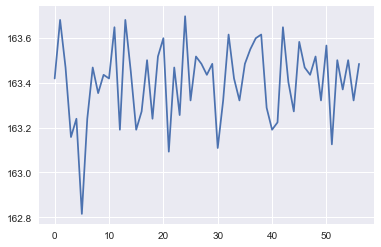

In [192]:
time = np.arange(y_test['id'].count())
pulse = y_test['pred'].reshape(y_test['id'].count())
plt.figure()
plt.plot(time, pulse)

In [202]:
y_train.argmin()

23

In [204]:
y_train.argmax()

38

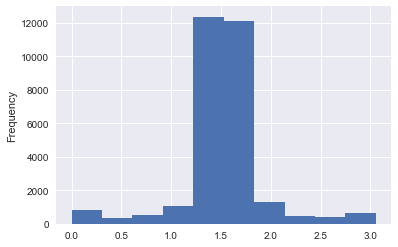

In [205]:
x_train.ix[23, :].plot(kind='hist')

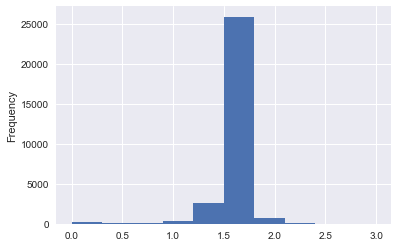

In [206]:
x_train.ix[38, :].plot(kind='hist')

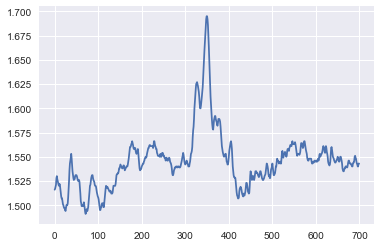

In [273]:
span = 700
time = np.arange(span)
pulse = x_train.ix[8, :span].values.reshape(span)
plt.figure()
plt.plot(time, pulse)

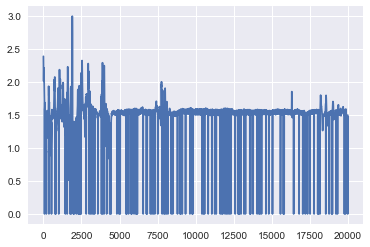

In [299]:
span = 20000
time = np.arange(span)
pulse = x_train.ix[38, :span].values.reshape(span)
plt.figure()
plt.plot(time, pulse)

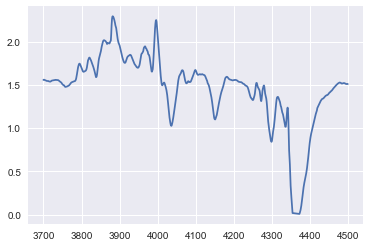

In [305]:
x_interpolate = x_train.ix[38].where(x_train.ix[38] != 0).interpolate(method='linear')
span = 4500
time = np.arange(3700, span)
pulse = x_interpolate[3700:span].values.reshape(800)
plt.figure()
plt.plot(time, pulse)

In [213]:
x_train.ix[23, :].describe(percentiles=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95])

count    30000.000000
mean         1.525688
std          0.422298
min          0.000000
5%           0.845950
10%          1.270000
25%          1.468000
50%          1.527000
75%          1.595000
90%          1.806000
95%          2.157050
max          3.056000
Name: 23, dtype: float64

In [259]:
x_train.ix[38, :].describe(percentiles=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95])

count    30000.000000
mean         1.530165
std          0.184661
min          0.000000
5%           1.389000
10%          1.495000
25%          1.517000
50%          1.540000
75%          1.569000
90%          1.591000
95%          1.666000
max          2.997000
Name: 38, dtype: float64

In [233]:
l = np.array(np.arange(20).reshape(5,4,1,1))
k = np.ones((5,4,3,3))
l*k

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.]],

        [[  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.]],

        [[  3.,   3.,   3.],
         [  3.,   3.,   3.],
         [  3.,   3.,   3.]]],


       [[[  4.,   4.,   4.],
         [  4.,   4.,   4.],
         [  4.,   4.,   4.]],

        [[  5.,   5.,   5.],
         [  5.,   5.,   5.],
         [  5.,   5.,   5.]],

        [[  6.,   6.,   6.],
         [  6.,   6.,   6.],
         [  6.,   6.,   6.]],

        [[  7.,   7.,   7.],
         [  7.,   7.,   7.],
         [  7.,   7.,   7.]]],


       [[[  8.,   8.,   8.],
         [  8.,   8.,   8.],
         [  8.,   8.,   8.]],

        [[  9.,   9.,   9.],
         [  9.,   9.,   9.],
         [  9.,   9.,   9.]],

        [[ 10.,  10.,  10.],
         [ 10.,  10.,  10.],
         [ 10.,  10.,  10.]],

        [[ 11.,  

In [247]:
nb_classes = 6
targets = np.array([[2, 3, 4, 0]]).reshape(-1)
one_hot_targets = np.eye(nb_classes)[targets]
targets


array([2, 3, 4, 0])

In [252]:
np.eye(5)[[2,3,3]]

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [258]:
tupl = ([3,4], 2)
tupl[0]


[3, 4]